In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris_df = pd.read_csv('iris_num.csv')

In [3]:
iris_df.head(8)

,sepal_length,sepal_width,petal_length,petal_width,target_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0


In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target_name
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_data = np.array(iris_df)
print(iris_data.shape)   ### data shape

(150, 5)


In [6]:
count_target = np.bincount(iris_data[:, 4].astype(int))
print(count_target)   ### 0, 1, 2 각각 50개씩 있음

[50 50 50]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
### X, y를 각각 train set과 test set으로 분리해줌

X_train, X_test, y_train, y_test = train_test_split(iris_data[:, 0:4], iris_data[:, 4].astype(int), random_state = 0, test_size=0.25)

In [9]:
print(X_train[:6], 'X Train Set\n')
print(X_test[:6], 'X Test Set\n')
print(y_train[:6], 'y Train Set\n')
print(y_test[:6], 'y Test Set\n')

[[ 5.9  3.   4.2  1.5]
 [ 5.8  2.6  4.   1.2]
 [ 6.8  3.   5.5  2.1]
 [ 4.7  3.2  1.3  0.2]
 [ 6.9  3.1  5.1  2.3]
 [ 5.   3.5  1.6  0.6]] X Train Set

[[ 5.8  2.8  5.1  2.4]
 [ 6.   2.2  4.   1. ]
 [ 5.5  4.2  1.4  0.2]
 [ 7.3  2.9  6.3  1.8]
 [ 5.   3.4  1.5  0.2]
 [ 6.3  3.3  6.   2.5]] X Test Set

[1 1 2 0 2 0] y Train Set

[2 1 0 2 0 2] y Test Set



In [10]:
count_train = np.bincount(y_train)
print(count_train)

[37 34 41]


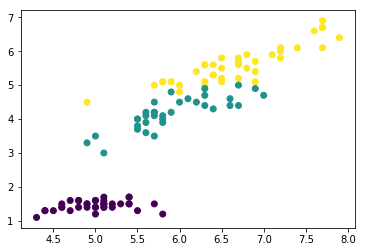

In [11]:
### sepal_length, petal_length의 scatter plot 찍어보기

_ = plt.scatter(X_train[:, 0], X_train[:, 2], c = y_train)

### Tensorflow로 분석해보자.

In [12]:
### y를 벡터형태로 변환시켜준다.

from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

Using TensorFlow backend.


In [13]:
import tensorflow as tf
from sklearn.utils import shuffle
sess = tf.Session()

In [14]:
### Model

x = tf.placeholder(tf.float32, shape=[None, 4])
t = tf.placeholder(tf.float32, shape=[None, 3])

W1 = tf.Variable(tf.truncated_normal([4, 3]))
b1 = tf.Variable(tf.zeros([3]))
y = tf.nn.softmax(tf.matmul(x, W1)+b1)


cross_ent = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices=[1]))   ### loss function (multi일때 사용)

lr = 0.1   ### learning rate
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_ent)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))   ### ?
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))   ### ?

In [15]:
sess.run(tf.global_variables_initializer())   ### initialize

In [16]:
n_samples = X_train.shape[0]
n_batch_size = 16   ### 보통 2^n 꼴로 정한다.
n_batches = n_samples // n_batch_size

print(n_samples)   ### Train : 112개 / Test : 38개
print(n_batches)   ### 7

112
7


In [17]:
print(X_train.dtype)
print(Y_train.dtype)

float64
int64


In [18]:
### Learning

for epoch in range(100):   ### 100번 반복
    X_, Y_ = shuffle(X_train, Y_train)   ### 순서를 섞어준다.
    
    for i in range(n_batches):   ### 16개씩 n_batches 번 학습
        start = i*n_batch_size
        end = start + n_batch_size
        sess.run(train_step, feed_dict={x:X_[start:end], t:Y_[start:end]})
        
    if epoch % 10 == 0:
        accuracy_train = accuracy.eval(session=sess, feed_dict={x:X_train, t:Y_train})
        print('epoch:', epoch, "accuracy of training set =", accuracy_train)

epoch: 0 accuracy of training set = 0.366071
epoch: 10 accuracy of training set = 0.776786
epoch: 20 accuracy of training set = 0.696429
epoch: 30 accuracy of training set = 0.875
epoch: 40 accuracy of training set = 0.973214
epoch: 50 accuracy of training set = 0.973214
epoch: 60 accuracy of training set = 0.973214
epoch: 70 accuracy of training set = 0.892857
epoch: 80 accuracy of training set = 0.875
epoch: 90 accuracy of training set = 0.973214


In [19]:
loss_train = cross_ent.eval(session=sess, feed_dict={x:X_train, t:Y_train})
accuracy_train = accuracy.eval(session=sess, feed_dict={x:X_train, t:Y_train})
print(loss_train, accuracy_train)

0.126911 0.973214


In [20]:
loss_test = cross_ent.eval(session=sess, feed_dict={x:X_test, t:Y_test})
accuracy_test = accuracy.eval(session=sess, feed_dict={x:X_test, t:Y_test})
print(loss_test, accuracy_test)

0.190057 0.947368


In [21]:
result = y.eval(session=sess, feed_dict={x:X_test})
print(result[:10])

[[  5.28543787e-05   1.52009036e-02   9.84746218e-01]
 [  3.34622734e-03   9.20538306e-01   7.61154369e-02]
 [  9.98296440e-01   1.70360622e-03   3.59184626e-10]
 [  5.72606268e-06   5.76589592e-02   9.42335367e-01]
 [  9.81988490e-01   1.80113986e-02   6.02155978e-08]
 [  8.78147421e-06   5.73486229e-03   9.94256318e-01]
 [  9.91925776e-01   8.07426032e-03   1.70995893e-08]
 [  7.97513686e-03   8.72657061e-01   1.19367748e-01]
 [  2.21901946e-03   8.31707537e-01   1.66073471e-01]
 [  2.21578218e-02   9.27774549e-01   5.00676185e-02]]


### Keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD   ### stochastic GD

In [23]:
model = Sequential()
model.add(Dense(input_dim = 4, units = 3, activation = 'sigmoid'))
model.add(Dense(units = 5, activation = 'sigmoid'))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.add(Dense(units = 3, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [24]:
lr = 0.1
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr), metrics = ['accuracy'])

In [25]:
### Learning

model.fit(X_train, Y_train, epochs = 100, batch_size = 16, verbose=0)

In [26]:
loss_and_metrics_Train = model.evaluate(X_train, Y_train)
print(loss_and_metrics_Train)
loss_and_metrics_Test = model.evaluate(X_test, Y_test)
print(loss_and_metrics_Test)

112/112 [==============================] - 0s 213us/step
[0.67252714293343685, 0.6964285714285714]
38/38 [==============================] - 0s 86us/step
[0.6965903639793396, 0.57894737155813925]


In [ ]:
model.